In [1]:
size_and_count = { 17: 10, 22: 10, 
          27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4 }

Following the approach seen in the previous lesson, calculate the PMG by normalizing each size. 

In [30]:
sizes = list(size_and_count.keys())
total = sum(size_and_count.values())
pmf = []
for key,val in size_and_count.items():
    pmf.append(round(val/total,3))
sizes, pmf

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

As an additional check, these probability values must sum to 1. Let's check for that

In [25]:
# Uncomment the line below, the output should be 1
import numpy as np
np.array(pmf).sum()

1.0

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the average of **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list to their probability of occurrence. You can do this using a loop.

In [35]:
# Calculate the expected value (mu) using formula above
mu = 0
for x,y in zip(sizes, pmf):
    mu += x*y
mu 

# 32.49000000000001

32.49000000000001

So according to the campus manager, the average class size is 27. This makes a lot of sense looking at the calculation above. We can plot a PMF function based on our findings for inspections. 

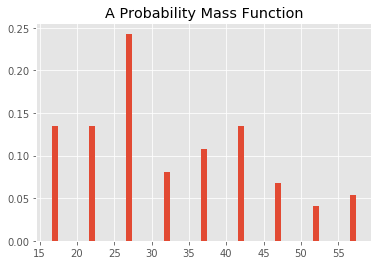

In [36]:
# Plot the pmf , it should look similar to the one shown below
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

plt.bar(sizes, pmf);
plt.title("A Probability Mass Function");

## Random Student Survey

Now we performed a survey on a random group of students about size of their classes, and compute the mean, according to the paradox, we observed that the average class is much bigger than 23.7. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation by students, where the probability associated with each class size is “biased” by the number of students in the class. Perform following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum for biased class size sum

The result is a new PMF that represents the biased distribution.

In [38]:
biased = []
for x,y in zip(sizes,pmf):
    biased.append(x*y)

biased_sum = round(sum(biased),2)

biased, biased_sum

# ([2.295, 2.97, 6.561, 2.592, 3.996, 5.67, 3.196, 2.132, 3.078], 32.49)

([2.295, 2.97, 6.561, 2.592, 3.996, 5.67, 3.196, 2.132, 3.078], 32.49)

You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [41]:
pmf2 = []
for val in biased:
    pmf2.append(round(val/biased_sum, 3))
    
sizes, pmf2

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

You can see that probabilities values in this PMF are different than our original pmf. Just like before, you can calulcate the expected value $\mu$.  

In [45]:
mu_biased = 0

for x,y in zip(sizes, pmf2):
    mu_biased += (x*y)

mu_biased
# 36.577000000000005

36.577000000000005

## Here comes the paradox 

Here we see it, the average or expected value of biased results comes out much higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, you can inspect both PMFs side by side visually to see the differences. 

* Plot a figure with two axes
* Show pmf1 and pmf2 side by side

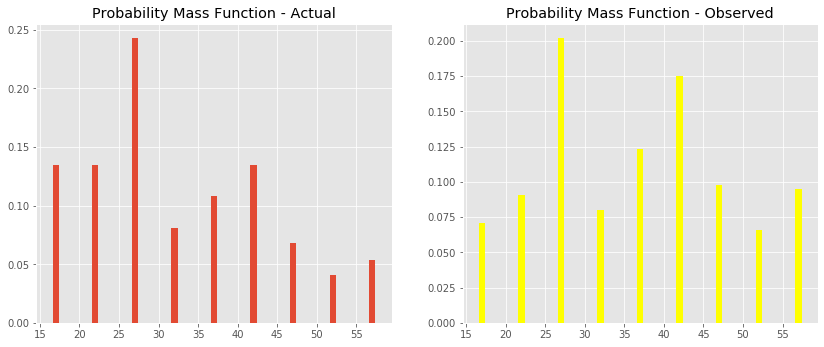

In [50]:
# Plot pmfs side by side
new_figure = plt.figure(figsize=(14,5.5))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(sizes, pmf)
ax2.bar(sizes, pmf2, color='yellow')

ax.set_title ("Probability Mass Function - Actual");
ax2.set_title ("Probability Mass Function - Observed");

plt.show()

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 36.577, which is quite a bit higher than the actual mean (~31.5).

To to an even more direct comparison, plot these pmfs on top of each other 
and change the parameter `alpha` so you can see both distributions well

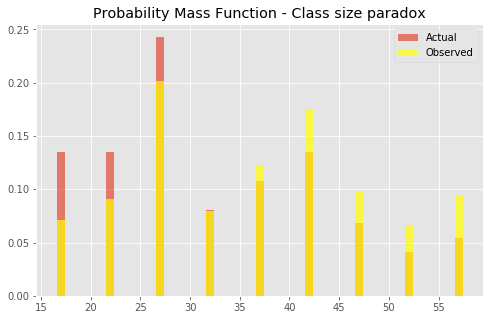

In [51]:
# Plot pmfs overlapping
plt.figure(figsize=(8,5))
plt.bar(sizes, pmf, label= 'Actual', alpha = 0.7 );
plt.bar(sizes, pmf2, label= 'Observed', alpha = 0.7, color= "yellow");
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

Here is the key. For smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Summary 
In this lesson we looked at a common paradox called a "Class Size Paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not limited to class sizes, but may also work with other similar scenarios. This paradox can become really complicated due to the large number of involved individuals and huge variations in the probabilities of their observations, based on their settings. 